In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_text, plot_tree

In [2]:
music= pd.read_csv('music.csv')
music

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [3]:
# feature selection
# Assume Male= 1, Female = 0
Features= ['age', 'gender']
Class= ['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic',]
X=music.drop(columns= 'genre')
Y= music['genre']

In [4]:
# training of models
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state=1)

Decision_classifier= DecisionTreeClassifier()
Decision_classifier.fit(X_train, Y_train)
Y_pred= Decision_classifier.predict(X_test)
print('Decision_Y_pred: ', Y_pred)

print('Decision_classifier: ', '\n' 'accuracy_score: ', accuracy_score(Y_test, Y_pred)*100,'%', 
     '\n', 'confusion_matrix: ', confusion_matrix(Y_test, Y_pred), '\n',
      'classification_report: ', classification_report(Y_test, Y_pred))

Random_Forest_classifier= RandomForestClassifier(n_estimators=100)
Random_Forest_classifier.fit(X_train, Y_train)
Y_pred_Random= Random_Forest_classifier.predict(X_test)

print('Random_Y_pred: ', Y_pred_Random)    
print('Random_Forest_classifier: ', '\n' 'accuracy_score: ', accuracy_score(Y_test, Y_pred_Random)*100,'%', 
     '\n', 'confusion_matrix: ', confusion_matrix(Y_test, Y_pred_Random), '\n',
      'classification_report: ', classification_report(Y_test, Y_pred_Random))
# Best model for deployment is Decision_tree classifier with 100% accuracy while Random_Forest_classifier has 75% accuracy

Decision_Y_pred:  ['Classical' 'Jazz' 'Acoustic' 'HipHop']
Decision_classifier:  
accuracy_score:  100.0 % 
 confusion_matrix:  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] 
 classification_report:                precision    recall  f1-score   support

    Acoustic       1.00      1.00      1.00         1
   Classical       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Random_Y_pred:  ['Jazz' 'HipHop' 'Acoustic' 'HipHop']
Random_Forest_classifier:  
accuracy_score:  50.0 % 
 confusion_matrix:  [[1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]] 
 classification_report:                precision    recall  f1-score   support

    Acoustic       1.00      1.00      1.00         1
   Classical       0.00      0.00      0.00         1
     

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# comparing Y_test and Y_predict from DecisionTree
print(f'For Decision_Tree_classifier, Y_test is: \n {pd.Series(Y_test)}\n while the Y_predict is: \n {pd.Series(Y_pred, index=Y_test.index)}')

For Decision_Tree_classifier, Y_test is: 
 6     Classical
3          Jazz
13     Acoustic
2        HipHop
Name: genre, dtype: object
 while the Y_predict is: 
 6     Classical
3          Jazz
13     Acoustic
2        HipHop
dtype: object


In [8]:
# Comparing Y_test and Y_predict from Random_forest
print(f'For Random_Forest_classifier, Y_test is: \n {pd.Series(Y_test)}\n while the Y_predict is: \n {pd.Series(Y_pred_Random, index=Y_test.index)}')

For Random_Forest_classifier, Y_test is: 
 6     Classical
3          Jazz
13     Acoustic
2        HipHop
Name: genre, dtype: object
 while the Y_predict is: 
 6         Jazz
3       HipHop
13    Acoustic
2       HipHop
dtype: object


In [27]:
# predicting type of music liked by a particular age of male and female not included in our dataset 
# predicting using decision tree classifier
New_Decision_Y_pred= Decision_classifier.predict([[28,1],[28,0]])
print('Decision_Y_pred: ', New_Decision_Y_pred)
print('\n')
New_Y_pred_Random= Random_Forest_classifier.predict([[28,1],[28,0]])
print('Random_Y_pred: ', New_Y_pred_Random)

Decision_Y_pred:  ['Jazz' 'Acoustic']


Random_Y_pred:  ['Jazz' 'Acoustic']


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Our results depicted that male with age 28 liked Jazz music while female liked acoustic

In [9]:
# printing Y_test
Y_test

6     Classical
3          Jazz
13     Acoustic
2        HipHop
Name: genre, dtype: object

In [10]:
# Exporting Decison Tree prediction as text file
Decision_text = export_text(Decision_classifier)
print(Decision_text)

|--- feature_0 <= 30.50
|   |--- feature_0 <= 25.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: Dance
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: HipHop
|   |--- feature_0 >  25.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: Acoustic
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: Jazz
|--- feature_0 >  30.50
|   |--- class: Classical



In [11]:
# Writing the exported text in a log file
with open('Decision_tree.log', "w") as f:
    f.write(Decision_text)

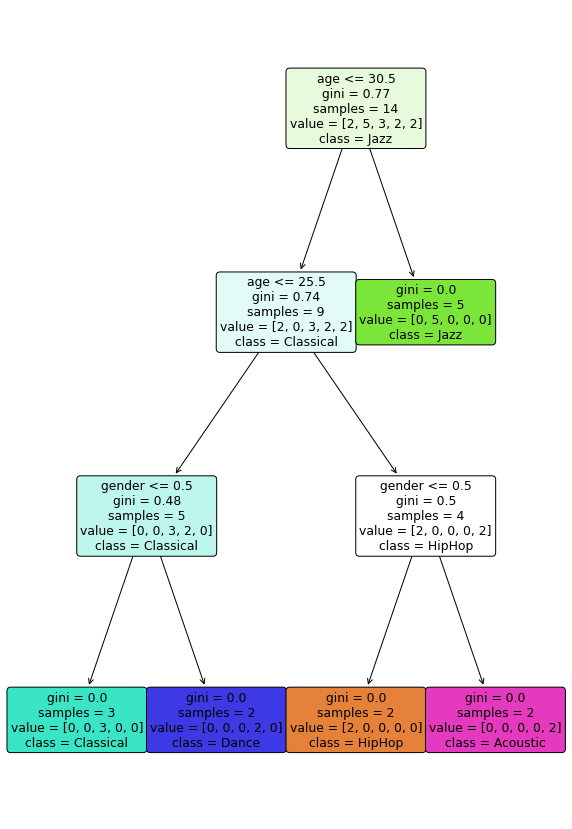

In [12]:
# plotting the decision tree
fig=plt.figure(figsize=(10,15))
_ = plot_tree(Decision_classifier, 
                feature_names = Features,
                class_names = Class,
                rounded = True, 
                precision = 2, filled = True)


In [13]:
plt.savefig('Decision_Tree_Classifier_Music.png')

<Figure size 432x288 with 0 Axes>